<a href="https://colab.research.google.com/github/Neket27/basic-examples-of-neural-networks/blob/main/lr4_zd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Находим индексы изображений с цифрой 0
zero_indices = np.where(y_train == 0)[0]

# Выводим 5 примеров цифры 0
for i in range(5):
    idx = zero_indices[i]
    print(f'--- Пример цифры 0 #{i+1} ---')
    for line in x_train[idx]:
        for num in line:
            # Порог для "яркости": > 0 или, например, > 100 — чтобы избежать шума
            if num > 100:
                print('*', end='')
            else:
                print(' ', end='')
        print()  # новая строка
    print('--- Конец примера ---\n')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- Пример цифры 0 #1 ---
                            
                            
                            
                            
                ***         
               *****        
              ******        
             ***** ***      
           ******* ***      
           *******  **      
          ****  *   **      
         ****       ***     
        ***         ***     
        **          ***     
       ***          ***     
       ***          ***     
       **          ***      
       **         ***       
       **        ***        
       **      ****         
       ***   *****          
       **********           
       ********             
        *****               
                            
                            
                            
                            
--- Конец примера ---

--- Пример цифры 0 #2 ---
                            
                            
    

ЗД_2

Saving figure some_digit_plot


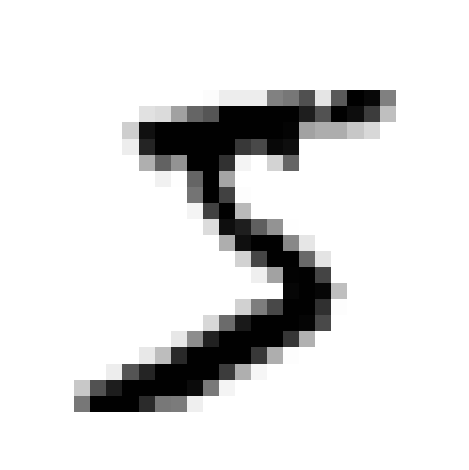

Saving figure more_digits_plot


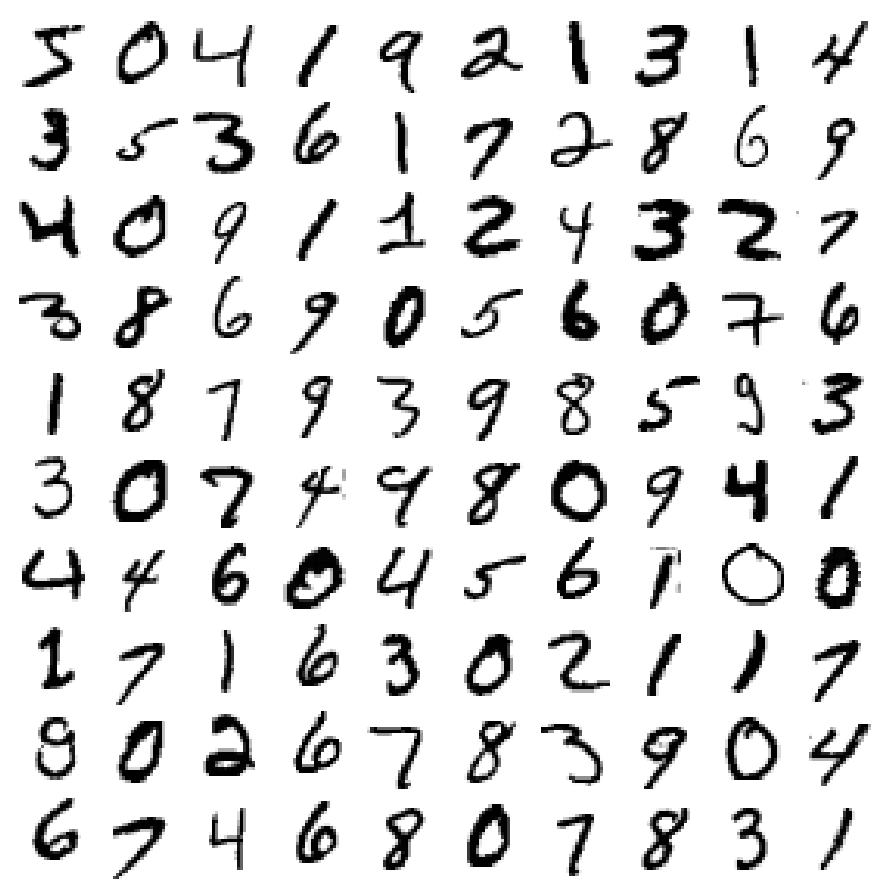

In [6]:
import sys

assert sys.version_info >= (3, 5)  # Проверяем версию Python

# Проверяем, запущен ли данный документ в Colab или Kaggle
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Требуется версия Scikit-Learn ≥ 0.20
import sklearn

assert sklearn.__version__ >= "0.20"  # Проверяем версию scikit-learn

# импортируем общие библиотеки
import numpy as np  # Для работы с массивами и математическими операциями
import os  # Для работы с файловой системой

# для стабильного запуска примера более одного раза
np.random.seed(42)  # Устанавливаем seed для воспроизводимости результатов

# Рисуем симпатичные рисунки %matplotlib inline  # Графики будут отображаться в ноутбуке
import matplotlib as mpl
import matplotlib.pyplot as plt

# Настраиваем размеры шрифтов для графиков
mpl.rc('axes', labelsize=14)  # Размер шрифта для подписей осей
mpl.rc('xtick', labelsize=12)  # Размер шрифта для меток оси X
mpl.rc('ytick', labelsize=12)  # Размер шрифта для меток оси Y

# Указываем куда сохранять рисунки
PROJECT_ROOT_DIR = "."  # Корневая директория проекта
CHAPTER_ID = "classification"  # Имя раздела
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  # Формируем путь для сохранения изображений
os.makedirs(IMAGES_PATH, exist_ok=True)  # Создаем директорию, если она не существует


# Функция для сохранения рисунков
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Формируем путь для сохранения файла
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)  # Выводим сообщение о сохранении
    if tight_layout:
        plt.tight_layout()  # Автоматически регулируем отступы для красивого расположения элементов
    # Сохраняем изображение с заданным разрешением
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Загружаем датасет MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)  # Загружаем MNIST через sklearn
mnist.keys()  # Просматриваем структуру данных (обычно содержит 'data' и 'target')

# Извлекаем признаки и метки
X, y = mnist["data"], mnist["target"]  # X - изображения, y - метки
X.shape  # Просматриваем размер матрицы признаков (70000 изображений по 784 пикселя)
y.shape  # Просматриваем размер вектора меток (70000 меток)

# 28*28 - стандартный размер изображений в MNIST (28 пикселей в высоту и ширину)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Визуализируем первую цифру из набора
some_digit = X[0]  # Берем первое изображение
some_digit_image = some_digit.reshape(28, 28)  # Преобразуем в двумерный массив 28x28
plt.imshow(some_digit_image, cmap=mpl.cm.binary)  # Отображаем изображение в черно-белых тонах
plt.axis("off")  # Скрываем оси координат

# save_fig("some_digit_plot") - сохраняем изображение в файл
save_fig("some_digit_plot")
plt.show()  # Отображаем график

# y[0] - просматриваем метку для первого изображения
y[0]

# y = y.astype(np.uint8) - преобразуем метки в целочисленный формат
y = y.astype(np.uint8)


# Функция для отображения одной цифры
def plot_digit(data):
    image = data.reshape(28, 28)  # Преобразуем одномерный массив в двумерное изображение
    # Отображаем изображение с ближайшей интерполяцией для сохранения четкости
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")  # Скрываем оси координат


# Выводим много цифр...
def plot_digits(instances, images_per_row=10, **options):
    size = 28  # Размер изображения в пикселях
    images_per_row = min(len(instances), images_per_row)  # Количество изображений в строке

    # Вычисляем количество строк, необходимое для размещения всех изображений
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Добавляем пустые изображения для заполнения сетки
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Изменяем форму массива для создания сетки изображений
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Комбинируем измерения массива для создания единой большой картинки
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)

    # Отображаем большую картинку со всеми цифрами
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")  # Скрываем оси координат


# Создаем фигуру размером 9x9 дюймов
plt.figure(figsize=(9, 9))
example_images = X[:100]  # Берем первые 100 изображений
plot_digits(example_images, images_per_row=10)  # Отображаем их в сетке 10x10
save_fig("more_digits_plot")  # Сохраняем изображение
plt.show()  # Отображаем график

ЗД_3

Saving figure variant_10_examples


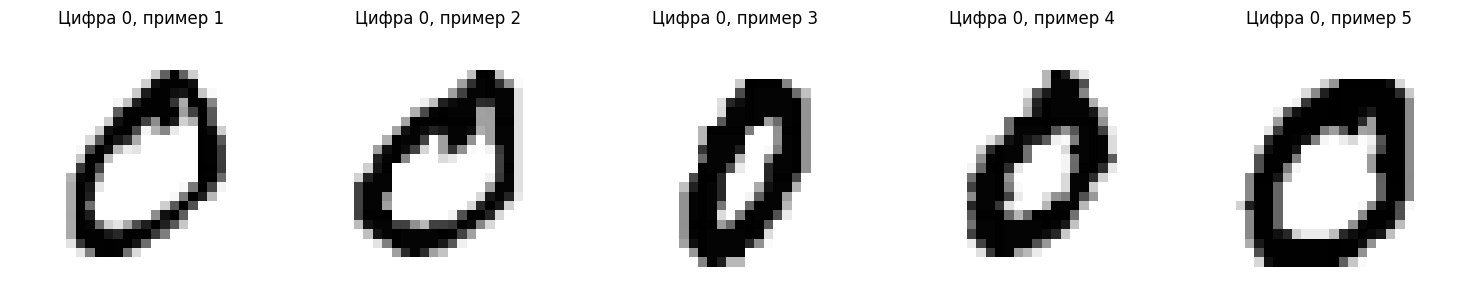

In [7]:
# Требуется версия Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Требуется версия Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# импортируем общие библиотеки
import numpy as np
import os
np.random.seed(42)  # для воспроизводимости результатов
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Создаем директорию для сохранения изображений
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Функция для сохранения рисунков
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Загружаем датасет MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Находим индексы изображений с цифрой 0 (последняя цифра варианта 10)
zero_indices = np.where(y == 0)[0]

# Визуализируем пять примеров цифры 0
plt.figure(figsize=(15, 3))  # Устанавливаем размер фигуры
for i in range(5):
    idx = zero_indices[i]
    plt.subplot(1, 5, i+1)  # Создаем подграфик в сетке 1x5
    digit_image = X[idx].reshape(28, 28)  # Преобразуем в двумерное изображение
    plt.imshow(digit_image, cmap=mpl.cm.binary)  # Отображаем с черно-белой цветовой картой
    plt.title(f"Цифра 0, пример {i+1}")  # Добавляем заголовок
    plt.axis("off")  # Скрываем оси координат

save_fig("variant_10_examples")  # Сохраняем результат
plt.show()  # Отображаем график

Зд_4

Эпоха 5/30, Потери: 0.0350
Эпоха 10/30, Потери: 0.0307
Эпоха 15/30, Потери: 0.0287
Эпоха 20/30, Потери: 0.0276
Эпоха 25/30, Потери: 0.0267
Эпоха 30/30, Потери: 0.0261

Точность на тестовой выборке: 99.19%


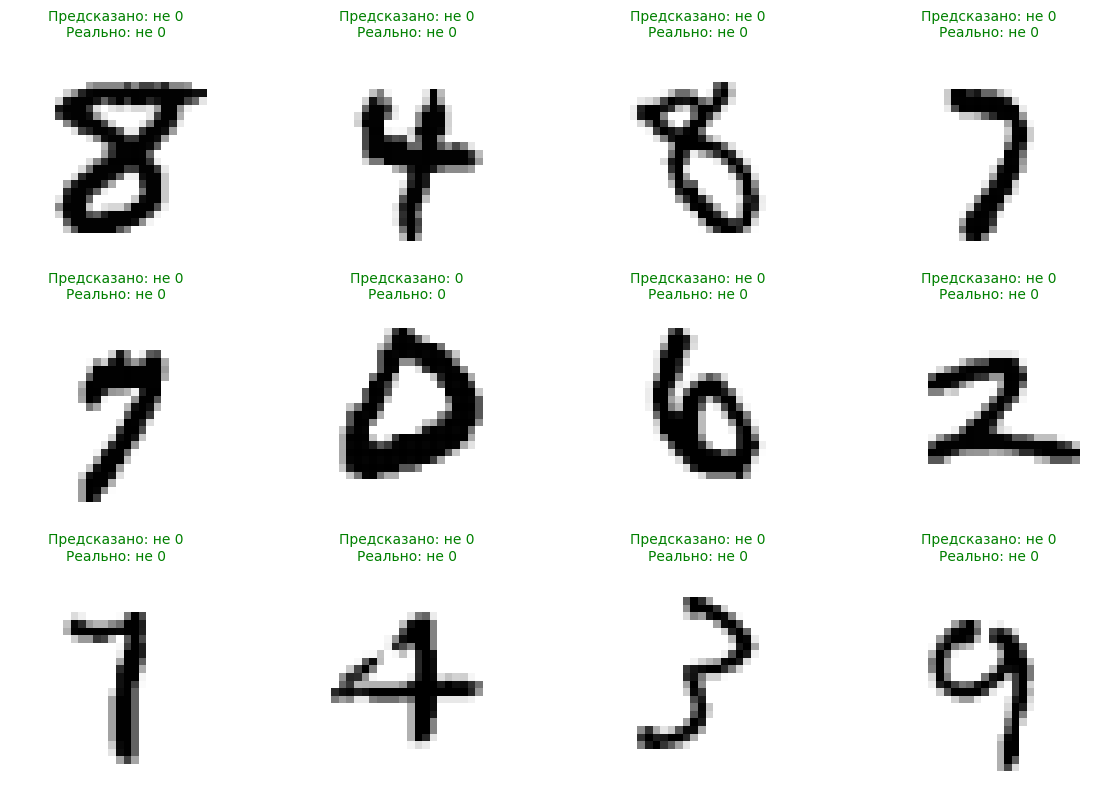

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Для варианта 10 распознаем цифру 0 (младший разряд)
# Создаем бинарные метки: 1 для цифры 0, 0 для всех остальных цифр
y_binary = (y == 0).astype(np.int8)

# Нормализация данных: масштабируем значения пикселей в диапазон [0, 1]
X = X / 255.0

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Параметры нейронной сети
input_size = 784  # 28x28 пикселей
output_size = 1   # Бинарная классификация (цифра 0 или не 0)

# Инициализация весов случайными значениями
np.random.seed(42)
weights = np.random.randn(input_size, output_size) * 0.01
bias = np.zeros((1, output_size))

# Функция активации (сигмоида)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция потерь (бинарная кросс-энтропия)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # Маленькое значение для предотвращения деления на ноль
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Ограничиваем значения в интервале (0, 1)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Параметры обучения
learning_rate = 0.1
num_epochs = 30
batch_size = 128

# Обучение нейронной сети
for epoch in range(num_epochs):
    # Перемешиваем обучающие данные
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    total_loss = 0

    # Обучение с использованием мини-батчей
    for i in range(0, X_train.shape[0], batch_size):
        # Берем пакет данных
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size].reshape(-1, 1)

        # Прямое распространение
        z = np.dot(X_batch, weights) + bias
        a = sigmoid(z)

        # Вычисление потерь
        loss = binary_cross_entropy(y_batch, a)
        total_loss += loss

        # Обратное распространение ошибки
        dz = a - y_batch
        dw = np.dot(X_batch.T, dz) / batch_size
        db = np.sum(dz, axis=0, keepdims=True) / batch_size

        # Обновление весов
        weights -= learning_rate * dw
        bias -= learning_rate * db

    # Выводим прогресс обучения
    avg_loss = total_loss / (X_train.shape[0] / batch_size)
    if (epoch + 1) % 5 == 0:
        print(f"Эпоха {epoch+1}/{num_epochs}, Потери: {avg_loss:.4f}")

# Тестирование нейронной сети
z_test = np.dot(X_test, weights) + bias
a_test = sigmoid(z_test)
predictions = (a_test > 0.5).astype(int).flatten()

# Вычисление точности
accuracy = np.mean(predictions == y_test)
print(f"\nТочность на тестовой выборке: {accuracy * 100:.2f}%")

# Визуализация результатов
plt.figure(figsize=(12, 8))
for i in range(12):  # Показываем 12 примеров
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='binary')

    # Определяем цвет заголовка в зависимости от правильности предсказания
    is_correct = (predictions[i] == y_test[i])
    color = 'green' if is_correct else 'red'
    predicted_digit = "0" if predictions[i] == 1 else "не 0"
    true_digit = "0" if y_test[i] == 1 else "не 0"

    plt.title(f"Предсказано: {predicted_digit}\nРеально: {true_digit}", color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.savefig('neural_network_results.png')
plt.show()